In [176]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import string
from sklearn.linear_model import LinearRegression

In [177]:
# Load the sheet 
df1 = pd.read_excel('Business1 (1).xlsx', sheet_name="Table 1")
df4 = pd.read_excel('Business1 (1).xlsx', sheet_name="Table 4")
df6 = pd.read_excel('Business1 (1).xlsx', sheet_name="Table 6")
df7 = pd.read_excel('Business1 (1).xlsx', sheet_name="Table 7")
df8 = pd.read_excel('Business1 (1).xlsx', sheet_name="Table 8")
df1.head()

,Category,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Space economy,101966,111559,113173,121868,123054,122183,119387,122860,118004,111560,115265,115962
1,Private industries,79861,89170,90495,98536,99506,98699,95196,96575,92167,85568,87779,86351
2,"Agriculture, forestry, fishing, and hu...",…,…,…,…,…,…,…,…,…,…,…,…
3,Farms,…,…,…,…,…,…,…,…,…,…,…,…
4,"Forestry, fishing, and related act...",…,…,…,…,…,…,…,…,…,…,…,…


### DATA CLEANING

In [178]:
def clean_data(df):
    df = df.replace("…", pd.NA)

    df["Category"] = df["Category"].str.strip()

    # Drop NaN values
    df = df.dropna(how="all", subset=df.columns[1:])

    # Select Neccessary Rows
    names_to_keep = ["Space economy", "Government", "Private industries",  
                     "Construction", "Manufacturing", "Wholesale trade", "Retail trade", "Transportation and warehousing", "Information", 
                     "Finance, insurance, real estate, rental, and leasing", "Professional and business services", 
                     "Educational services, health care, and social assistance", "Arts, entertainment, recreation, accommodation, and food services", 
                     "Other services, except government", "Space economy excluding satellite television, satellite radio, and educational services"]
    df_subset = df[df["Category"].isin(names_to_keep)]

    df_subset = df_subset.reset_index(drop=True)
    
    return df_subset

def private_only(df):
    df = df.replace("…", pd.NA)

    df["Category"] = df["Category"].str.strip()

    # Drop NaN values
    df = df.dropna(how="all", subset=df.columns[1:])

    # Select Neccessary Rows
    names_to_keep = ["Private industries",  
                     "Construction", "Manufacturing", "Wholesale trade", "Retail trade", "Transportation and warehousing", "Information", 
                     "Finance, insurance, real estate, rental, and leasing", "Professional and business services", 
                     "Educational services, health care, and social assistance", "Arts, entertainment, recreation, accommodation, and food services", 
                     "Other services, except government", "Space economy excluding satellite television, satellite radio, and educational services"]
    df_subset = df[df["Category"].isin(names_to_keep)]

    df_subset = df_subset.reset_index(drop=True)
    
    return df_subset

def clean_employment_compensation(df):
    df = df.replace("…", pd.NA)

    df["Category"] = df["Category"].str.strip()

    # Drop NaN values
    df = df.dropna(how="all", subset=df.columns[1:])

    # Select Neccessary Rows
    names_to_keep = [
    "Space economy, private industries",
    "Mining",
    "Utilities",
    "Construction",
    "Manufacturing",
    "Wholesale trade",
    "Retail trade",
    "Transportation and warehousing",
    "Information",
    "Finance, insurance, real estate, rental, and leasing",
    "Professional and business services",
    "Educational services, health care, and social assistance",
    "Arts, entertainment, recreation, accommodation, and food services",
    "Other services, except government",
    "Space economy excluding satellite television, satellite radio, and educational services"
]
    df_subset = df[df["Category"].isin(names_to_keep)]

    df_subset = df_subset.reset_index(drop=True)
    
    return df_subset

def rename_columns(df):
    df['Category'] = df['Category'].replace({
        'Finance, insurance, real estate, rental, and leasing': 'Finance and Real Estate',
        'Professional and business services': 'Business',
        'Educational services, health care, and social assistance': 'Education and Healthcare',
        'Other services, except government': 'Other Services',
        'Arts, entertainment, recreation, accommodation, and food services': 'Recreation and Entertainment',
        'Space economy, private industries': 'Space economy'
        })
    return df

In [141]:
table1_data = rename_columns(clean_data(df1))
table4_data = rename_columns(clean_data(df4))
display(table1_data)
display(table4_data)

,Category,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Space economy,101966,111559,113173,121868,123054,122183,119387,122860,118004,111560,115265,115962
1,Private industries,79861,89170,90495,98536,99506,98699,95196,96575,92167,85568,87779,86351
2,Construction,265,239,346,406,403,585,360,1049,850,513,632,646
3,Manufacturing,24193,26789,27121,29264,32387,32514,33589,37565,35618,38519,38760,38773
4,Wholesale trade,14496,17163,18946,21350,21696,21736,21647,19279,20007,14253,14875,14101
5,Retail trade,219,245,259,331,478,379,442,667,406,570,602,631
6,Transportation and warehousing,909,821,727,703,743,729,859,691,641,627,915,925
7,Information,31515,35454,34745,37502,34604,33759,29919,29066,26709,24360,22771,21859
8,Finance and Real Estate,242,145,131,209,255,220,154,133,97,112,183,178
9,Business,6481,6852,6826,7346,7232,7153,6539,6767,6139,6776,8659,8706


,Category,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Space economy,182757,190256,195919,205707,206542,207911,205358,208510,200271,194131,203295,202094
1,Private industries,151467,159229,164508,173324,173764,175789,172479,172473,163865,156995,164711,161677
2,Construction,383,350,515,618,653,913,545,1649,1433,832,1014,1077
3,Manufacturing,44500,45870,46345,48639,50423,50217,52215,57984,55157,55601,59475,61224
4,Wholesale trade,29109,32868,35800,39743,41461,44876,46038,40826,40181,37101,38839,36402
5,Retail trade,306,341,349,431,602,473,554,815,528,745,777,815
6,Transportation and warehousing,1690,1503,1340,1309,1341,1317,1580,1268,1210,1150,1779,1743
7,Information,60813,63569,65895,67671,64263,62747,57238,55479,52180,47624,45241,43112
8,Finance and Real Estate,457,276,218,322,379,312,242,200,141,153,306,302
9,Business,11437,11874,11779,12219,12179,12568,11487,11977,10533,11807,14925,14773


In [142]:
table1_without_gov = rename_columns(private_only(table1_data))
table4_without_gov = rename_columns(private_only(table4_data))

In [143]:

df6.head(10)

,Category,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Space economy,103.656,102.525,101.143,99.775,99.159,100,101.822,103.843,104.588,110.39,115.408,119.198
1,Private industries,105.696,104.063,102.025,100.329,99.403,100,101.551,103.61,104.367,110.827,115.488,119.001
2,"Agriculture, forestry, fishing, and hu...",…,…,…,…,…,…,…,…,…,…,…,…
3,Farms,…,…,…,…,…,…,…,…,…,…,…,…
4,"Forestry, fishing, and related act...",…,…,…,…,…,…,…,…,…,…,…,…
5,Mining,92.8,93.932,96.155,98.58,97.098,100,103.326,104.856,108.712,110.872,113.527,115.574
6,Oil and gas extraction,92.792,93.931,96.161,98.591,97.108,100,103.279,104.767,108.436,110.386,112.92,114.906
7,"Mining, except oil and gas",92.656,93.806,96.042,98.479,96.994,100,103.601,105.366,110.087,113.214,116.477,118.829
8,Support activities for mining,92.85,93.963,96.167,98.577,97.096,100,103.37,104.942,109.022,111.438,114.229,116.343
9,Utilities,100.661,100.104,99.833,100.297,99.188,100,100.171,99.942,99.913,99.509,101.024,102.055


In [144]:
table6_data = rename_columns(clean_data(df6))
print(table6_data.columns.tolist())

['Category', 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [145]:
new_row = {
    "Category": "Mining",
    2012: 92.800,
    2013: 93.932,
    2014: 96.155,
    2015: 98.580,
    2016: 97.098,
    2017: 100.000,
    2018: 103.326,
    2019: 104.856,
    2020: 108.712,
    2021: 110.872,
    2022: 113.527,
    2023: 115.574
}
table6_data = pd.concat([table6_data, pd.DataFrame([new_row])], ignore_index=True)
new_row = {
    "Category": "Utilities",
    2012: 100.661,
    2013: 100.104,
    2014: 99.833,
    2015: 100.297,
    2016: 99.188,
    2017: 100.000,
    2018: 100.171,
    2019: 99.942,
    2020: 99.913,
    2021: 99.509,
    2022: 101.024,
    2023: 102.055
}

table6_data.loc[len(table6_data)] = new_row
display(table6_data)

,Category,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Space economy,103.656,102.525,101.143,99.775,99.159,100,101.822,103.843,104.588,110.39,115.408,119.198
1,Private industries,105.696,104.063,102.025,100.329,99.403,100,101.551,103.61,104.367,110.827,115.488,119.001
2,Construction,90.721,92.654,94.648,95.775,96.933,100,104.38,109.268,112.897,119.671,135.532,142.181
3,Manufacturing,126.702,123.769,117.436,109.796,102.411,100,97.435,95.755,94.854,94.386,96.275,97.786
4,Wholesale trade,104.674,98.298,95.604,96.712,97.649,100,102.323,107.806,110.398,132.48,141.396,148.847
5,Retail trade,88.263,97.871,97.908,96.808,92.674,100,99.719,91.552,97.1,104.166,98.605,104.25
6,Transportation and warehousing,101.268,101.216,102.559,99.892,98.403,100,104.595,107.517,104.662,114.74,136.22,134.114
7,Information,94.547,95.445,95.844,96.051,98.753,100,104.045,107.281,107.737,110.804,115.175,118.424
8,Finance and Real Estate,95.344,95.895,96.999,98.791,99.302,100,101.195,103.081,107.194,109.184,113.837,121.885
9,Business,93.053,94.194,95.962,98.246,97.436,100,103.024,104.659,108.12,110.675,113.943,116.384


In [146]:
table7_data = rename_columns(clean_employment_compensation(df7))
display(table7_data)
table8_data = rename_columns(clean_employment_compensation(df8))
display(table8_data)

,Category,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Space economy,433,432,426,424,411,399,387,390,365,351,361,373
1,Mining,0,0,0,0,0,0,0,0,0,0,0,0
2,Utilities,0,0,0,0,0,0,0,0,0,0,0,0
3,Construction,1,1,1,1,1,2,1,2,2,2,3,2
4,Manufacturing,136,137,133,131,128,118,116,123,112,111,104,109
5,Wholesale trade,94,90,87,91,91,94,93,89,87,84,88,85
6,Retail trade,3,4,4,4,6,5,6,7,5,6,6,6
7,Transportation and warehousing,6,5,5,4,4,4,5,4,5,4,6,6
8,Information,120,123,125,118,108,106,98,93,85,75,72,70
9,Finance and Real Estate,1,1,0,1,1,1,0,0,0,0,1,1


,Category,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Space economy,44438,45211,45941,48237,47959,49104,48686,52606,51661,52655,54975,57924
1,Mining,10,8,9,11,7,2,1,1,1,0,0,0
2,Utilities,0,0,0,1,1,1,0,0,0,0,0,0
3,Construction,122,100,170,212,214,322,209,651,541,338,457,508
4,Manufacturing,19435,19334,19184,19837,20098,20303,20531,23972,23243,24035,23106,24270
5,Wholesale trade,7708,7612,7667,8402,8676,9262,9415,9058,9219,9442,10279,10483
6,Retail trade,107,143,155,194,265,230,270,361,217,342,300,316
7,Transportation and warehousing,401,364,322,323,345,338,412,358,410,346,557,601
8,Information,10347,11018,11688,11789,11116,11366,10665,10596,10231,9744,9795,10230
9,Finance and Real Estate,118,69,51,74,83,75,53,45,35,41,76,83


In [170]:
import pandas as pd
import numpy as np
import string

# Assume your inputs:
# table6 -> price indexes (base=100)
# table8 -> nominal values
# each has a 'Category' column; remaining columns are years
table6_data = table6_data.copy()
table8_data = table8_data.copy()

table6_data["Category_key"] = table6_data["Category"]
table8_data["Category_key"] = table8_data["Category"]

t6 = (table6_data
      .drop(columns=["Category"])
      .groupby("Category_key", as_index=True)
      .first())
t8 = (table8_data
      .drop(columns=["Category"])
      .groupby("Category_key", as_index=True)
      .first())

# union of rows (categories) and columns (years)
rows = t8.index.union(t6.index)
cols = t8.columns.union(t6.columns)

t6u = t6.reindex(index=rows, columns=cols)
t8u = t8.reindex(index=rows, columns=cols)

# multiplies to get real compensation
real_compensation = t8u.mul(t6u.div(100))

name_map8 = dict(zip(table8_data["Category_key"], table8_data["Category"]))
name_map6 = dict(zip(table6_data["Category_key"], table6_data["Category"]))
display_name = pd.Series(rows, index=rows).map(name_map8).fillna(pd.Series(rows, index=rows).map(name_map6))

real_compensation = real_compensation.copy()
real_compensation.insert(0, "Category", display_name.values)
real_compensation = real_out.rename_axis(None).reset_index(drop=True)

real_compensation = real_compensation[real_compensation["Category"] != "Private industries"]
real_compensation.to_csv('real_compensation.csv', index=False)
display(real_compensation)

,Category,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Business,4640.55311,5060.10168,5268.3138,6025.42718,5718.51884,5934.0,5795.1,6173.83441,6246.0924,7082.09325,9305.72481,10031.13696
1,Construction,110.67962,92.654,160.9016,203.043,207.43662,322.0,218.1542,711.33468,610.77277,404.48798,619.38124,722.27948
2,Education and Healthcare,1104.88887,1105.09675,1139.95472,1177.71354,1205.85793,1213.0,1482.99606,1670.29128,2014.90608,2031.30963,2397.84732,3093.57924
3,Finance and Real Estate,112.50592,66.16755,49.46949,73.10534,82.42066,75.0,53.63335,46.38645,37.5179,44.76544,86.51612,101.16455
4,Information,9782.77809,10516.1301,11202.24672,11323.45239,10977.38348,11366.0,11096.39925,11367.49476,11022.57247,10796.74176,11281.39125,12114.7752
5,Manufacturing,24624.5337,23929.49846,22528.92224,21780.23252,20582.56278,20303.0,20004.37985,22954.3886,22046.91522,22685.6751,22245.3015,23732.6622
6,Mining,9.28,7.51456,8.65395,10.8438,6.79686,2.0,1.03326,1.04856,1.08712,0.0,0.0,0.0
7,Other Services,1.96906,2.0089,2.0077,1.99238,1.94922,2.0,1.9777,1.85452,2.83995,2.85615,2.74563,2.82855
9,Recreation and Entertainment,36.3184,41.67315,47.076,45.11295,51.74125,56.0,59.32214,62.42435,75.82896,59.64035,65.39724,83.49483
10,Retail trade,94.44141,139.95553,151.7574,187.80752,245.5861,230.0,269.2413,330.50272,210.707,356.24772,295.815,329.43


### Data Visualization

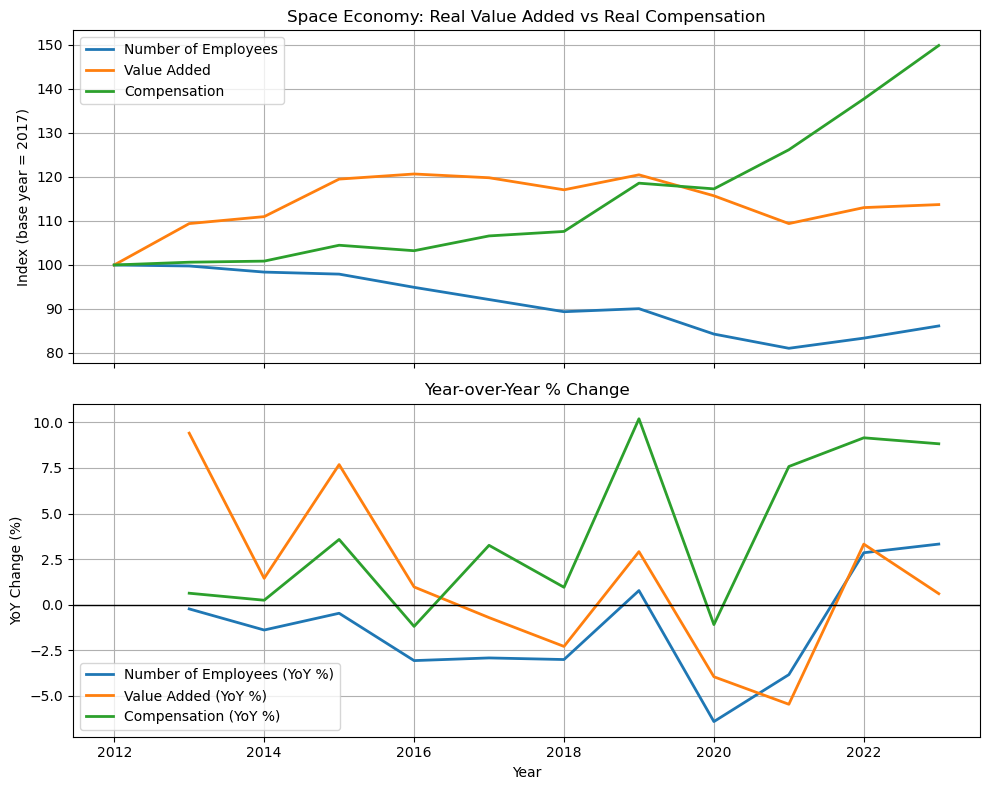

In [148]:
value_added_row = table1_data[table1_data["Category"] == "Space economy"]
compensation_row = real_compensation[real_compensation["Category"] == "Space economy"]
employees_row = table7_data[table7_data["Category"] == "Space economy"]

value_added_series = value_added_row.drop(columns=["Category"]).T.squeeze()
compensation_series = compensation_row.drop(columns=["Category"]).T.squeeze()
employees_row_series = employees_row.drop(columns=["Category"]).T.squeeze()

value_added_series.index = value_added_series.index.astype(int)
compensation_series.index = compensation_series.index.astype(int)
employees_row_series.index = employees_row_series.index.astype(int)

years = value_added_series.index.intersection(compensation_series.index)
value_added_series = value_added_series.loc[years].astype(float)
compensation_series = compensation_series.loc[years].astype(float)
employees_row_series = employees_row_series.loc[years].astype(float)

value_added_yoy = value_added_series.pct_change() * 100
compensation_yoy = compensation_series.pct_change() * 100
employees_yoy = employees_row_series.pct_change() * 100

value_added_idx = value_added_series / value_added_series.iloc[0] * 100
compensation_idx = compensation_series / compensation_series.iloc[0] * 100
employees_idx = employees_row_series / employees_row_series.iloc[0] * 100

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# (A) Indexed levels
axes[0].plot(years, employees_idx, label="Number of Employees", linewidth=2)
axes[0].plot(years, value_added_idx, label="Value Added", linewidth=2)
axes[0].plot(years, compensation_idx, label="Compensation", linewidth=2)
axes[0].set_ylabel("Index (base year = 2017)")
axes[0].set_title("Space Economy: Real Value Added vs Real Compensation")
axes[0].legend()
axes[0].grid(True)

# (B) YoY % changes
axes[1].plot(years, employees_yoy, label="Number of Employees (YoY %)", linewidth=2)
axes[1].plot(years, value_added_yoy, label="Value Added (YoY %)", linewidth=2)
axes[1].plot(years, compensation_yoy, label="Compensation (YoY %)", linewidth=2)
axes[1].axhline(0, color="black", linewidth=1)
axes[1].set_ylabel("YoY Change (%)")
axes[1].set_xlabel("Year")
axes[1].set_title("Year-over-Year % Change")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()



## Interpretation:
The space economy’s labor income is growing much faster than its overall net output. This could reflect:

Rising wages in the sector.

Employment growth within space-related industries.

A redistribution of the space economy’s value capture, with more going to labor relative to capital.

## Interpretation:
The resilience of compensation relative to value added indicates that:

Labor earnings in the space economy are less sensitive to output downturns.

Firms may be maintaining employment/wages even when productivity or output slows.

This could point to sticky wages, strategic investment in talent, or increased demand for labor in space-related industries even during output fluctuations.

## Together, the charts show:

Divergence since 2018:

Value added (output) is relatively flat, while compensation (labor income) is surging.

Implication:

The space economy is becoming more labor-intensive in terms of where its gains are going.

Workers are capturing a growing share of the sector’s output, which may indicate rising wages, more jobs, or both.

Economic story:

This suggests the space economy is increasingly important as a source of income and jobs, not just as a producer of high-value technology.

It also raises questions: if compensation rises much faster than value added, is profitability being squeezed? Or is there an inflow of new investment subsidizing labor costs?

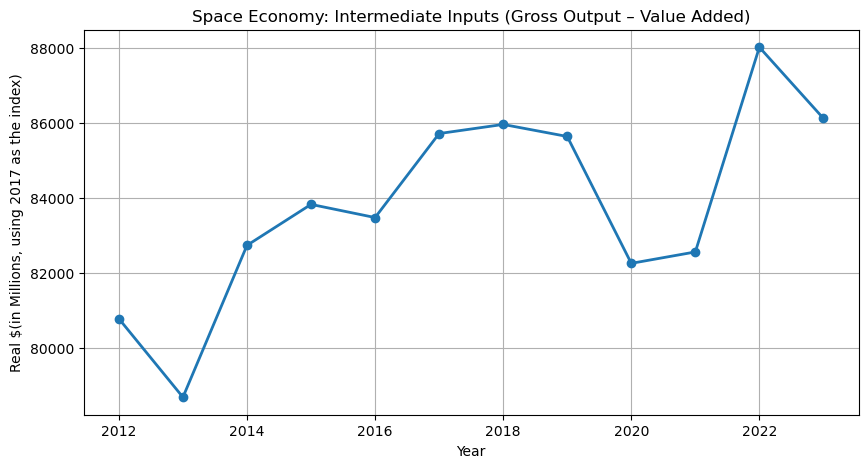

In [149]:
gross_output_row = table4_data[table4_data["Category"] == "Space economy"]
value_added_row = table1_data[table1_data["Category"] == "Space economy"]

# 2. Convert to Series indexed by year
gross_output_series = gross_output_row.drop(columns=["Category"]).T.squeeze()
value_added_series = value_added_row.drop(columns=["Category"]).T.squeeze()

# Ensure year index is int
gross_output_series.index = gross_output_series.index.astype(int)
value_added_series.index = value_added_series.index.astype(int)


years = gross_output_series.index.intersection(value_added_series.index)
gross_output_series = gross_output_series.loc[years].astype(float)
value_added_series = value_added_series.loc[years].astype(float)


intermediate_inputs = gross_output_series - value_added_series


import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(years, intermediate_inputs, marker="o", linewidth=2)
ax1.set_title("Space Economy: Intermediate Inputs (Gross Output – Value Added)")
ax1.set_ylabel("Real $(in Millions, using 2017 as the index)")
ax1.set_xlabel("Year")
ax1.grid(True)

plt.show()


This figure tells us the intermediate inputs for the space economy. The intermediate inputs the space economy buys from other industries (manufacturing, IT, R&D, materials, logistics, etc.). 

Level of the series (~$80–88 billion real $) is how much value other industries contribute indirectly to the space economy’s output each year. It’s a proxy for the supply-chain footprint of the space sector.

The rising or falling trends show us that if intermediate inputs increase, the space economy is demanding more from its upstream suppliers (growth in its surrounding ecosystem). If they fall or stagnate, the sector may be shifting to more self-contained production or efficiency gains that reduce reliance on outside inputs.

The Volatility (like 2020 drop), likely reflects disruptions (COVID, supply chain shocks, etc.). When inputs dip sharply but VA doesn’t fall as much, it could mean more of the value is being produced internally to the space sector.

Relative to the value added, if intermediate inputs grow faster than value added, the sector is becoming more interconnected with other industries. If value added grows faster, the sector is capturing more of the value internally.


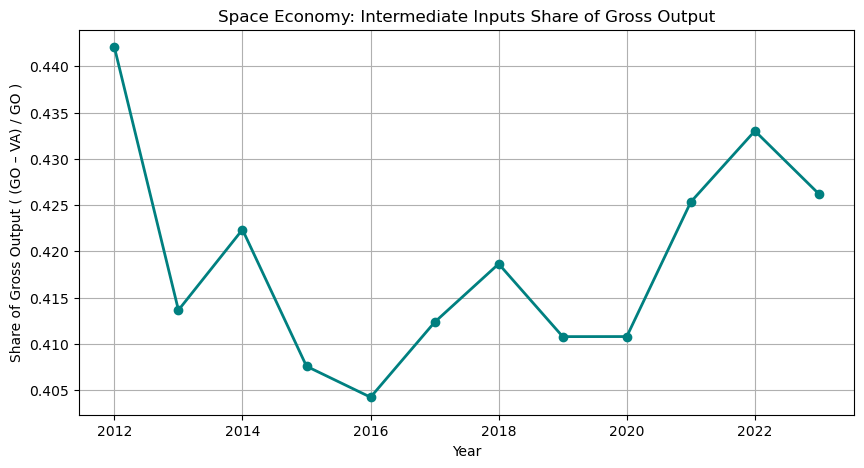

In [150]:
intermediate_share = (gross_output_series - value_added_series) / gross_output_series

# Plot
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(years, intermediate_share, marker="o", linewidth=2, color="teal")
ax.set_title("Space Economy: Intermediate Inputs Share of Gross Output")
ax.set_ylabel("Share of Gross Output ( (GO – VA) / GO )")
ax.set_xlabel("Year")
ax.grid(True)

plt.show()

## Interpretation

High share (closer to 1): The space economy relies heavily on purchased inputs (materials, R&D, IT, logistics, etc.) from other industries → strong supply-chain linkages.

Low share (closer to 0): More of gross output is being generated internally as value added (wages, profits, capital income).

## Trend meaning:

If (GO – VA)/GO increases → space economy is becoming more dependent on upstream suppliers.

If it decreases → the sector is capturing more of the value itself (possibly through vertical integration, automation, or higher productivity).

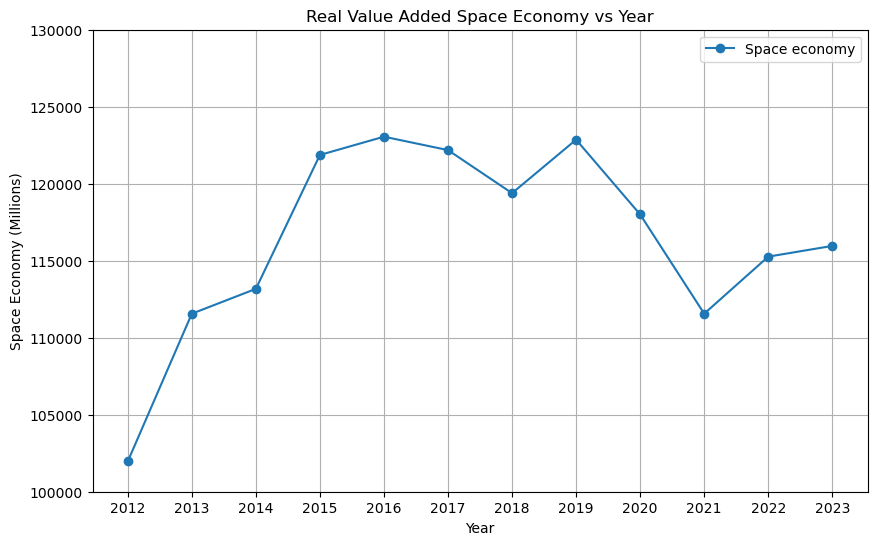

In [151]:
# Pick only the rows we want
df_subset = table1_data[table1_data["Category"].isin(
    ["Space economy"]
)]

# Set "Category" as index so years stay as columns
df_subset = df_subset.set_index("Category")

# Transpose so years are the index (x-axis) and categories are columns
df_t = df_subset.T

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_t.index, df_t["Space economy"], marker="o", label="Space economy")

plt.title("Real Value Added Space Economy vs Year")
plt.xlabel("Year")
plt.ylabel("Space Economy (Millions)")
plt.ylim(100000, 130000)

# Show all years on x-axis
plt.xticks(df_t.index.astype(int))

plt.legend(loc="upper right")
plt.grid(True)
plt.show()

Simple visualizations showing Real Value Added vs Year

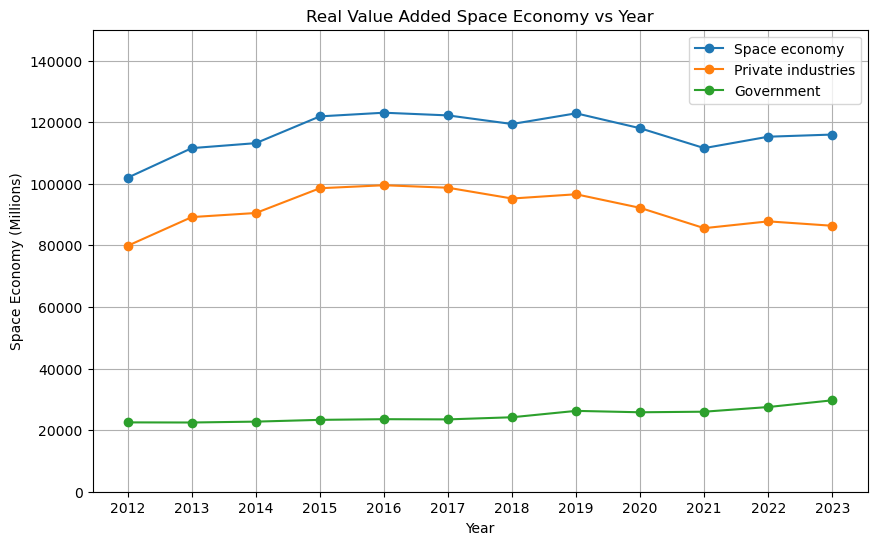

In [152]:
# Pick only the rows we want
df_subset = table1_data[table1_data["Category"].isin(
    ["Space economy", "Private industries", "Government"]
)]

# Set "Category" as index so years stay as columns
df_subset = df_subset.set_index("Category")

# Transpose so years are the index (x-axis) and categories are columns
df_t = df_subset.T

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_t.index, df_t["Space economy"], marker="o", label="Space economy")
plt.plot(df_t.index, df_t["Private industries"], marker="o", label="Private industries")
plt.plot(df_t.index, df_t["Government"], marker="o", label="Government")

plt.title("Real Value Added Space Economy vs Year")
plt.xlabel("Year")
plt.ylabel("Space Economy (Millions)")
plt.ylim(0, 150000)

# Show all years on x-axis
plt.xticks(df_t.index.astype(int))

plt.legend(loc="upper right")
plt.grid(True)
plt.show()

This graph shows a general overview and how private industries are the main drivers of the space economy and real value added

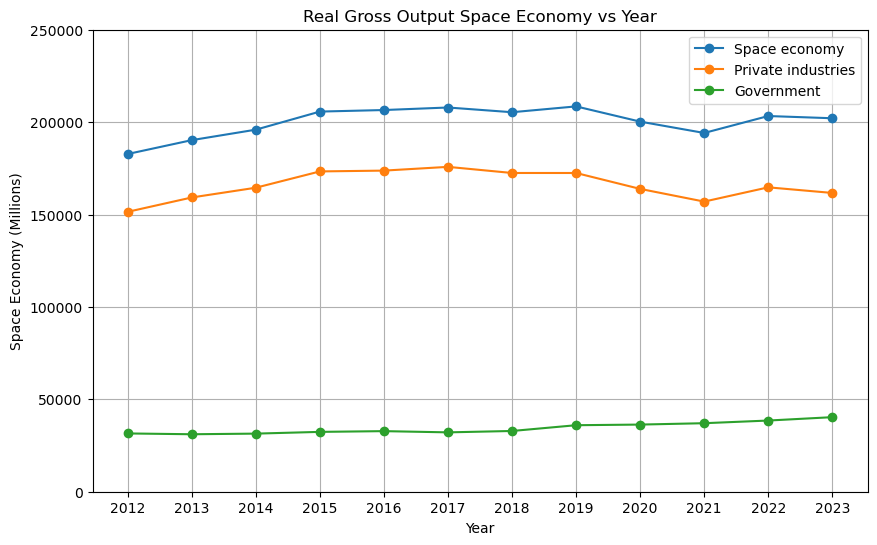

In [153]:
# Pick only the rows we want
df_subset = table4_data[table4_data["Category"].isin(
    ["Space economy", "Private industries", "Government"]
)]

# Set "Category" as index so years stay as columns
df_subset = df_subset.set_index("Category")

# Transpose so years are the index (x-axis) and categories are columns
df_t = df_subset.T

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_t.index, df_t["Space economy"], marker="o", label="Space economy")
plt.plot(df_t.index, df_t["Private industries"], marker="o", label="Private industries")
plt.plot(df_t.index, df_t["Government"], marker="o", label="Government")

plt.title("Real Gross Output Space Economy vs Year")
plt.xlabel("Year")
plt.ylabel("Space Economy (Millions)")
plt.ylim(0, 250000)

# Show all years on x-axis
plt.xticks(df_t.index.astype(int))


plt.legend(loc="upper right")
plt.grid(True)
plt.show()

This graph shows a general overview and how private industries are the main drivers of the space economy and real gross output 

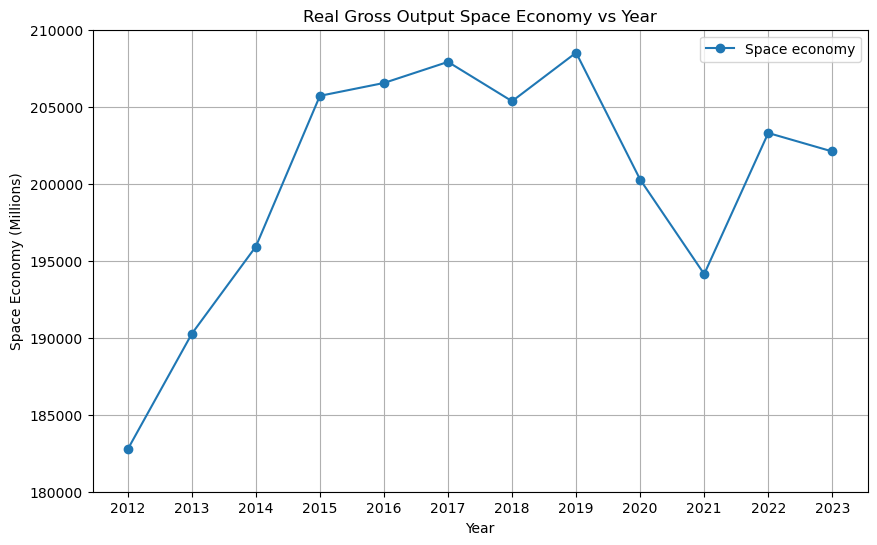

In [154]:
# Pick only the rows we want
df_subset = table4_data[table4_data["Category"].isin(
    ["Space economy"]
)]

# Set "Category" as index so years stay as columns
df_subset = df_subset.set_index("Category")

# Transpose so years are the index (x-axis) and categories are columns
df_t = df_subset.T

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_t.index, df_t["Space economy"], marker="o", label="Space economy")

plt.title("Real Gross Output Space Economy vs Year")
plt.xlabel("Year")
plt.ylabel("Space Economy (Millions)")
plt.ylim(180000, 210000)

# Show all years on x-axis
plt.xticks(df_t.index.astype(int))

plt.legend(loc="upper right")
plt.grid(True)
plt.show()


This graph shows real gross output vs year

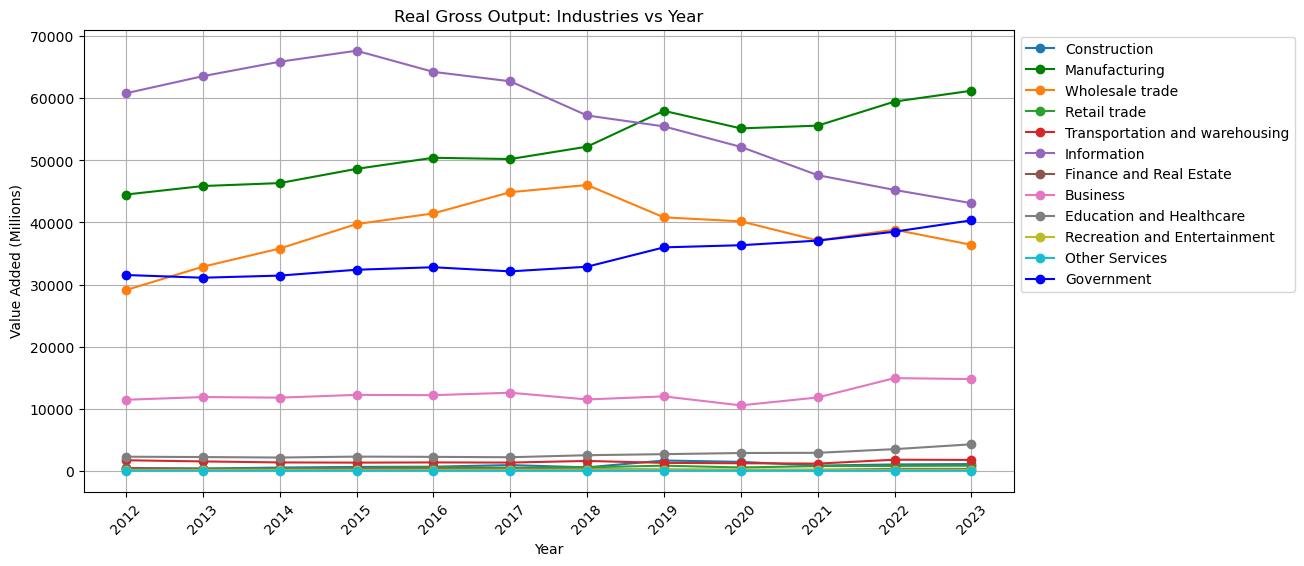

In [175]:
df_t = table4_data.set_index("Category").T
df_t = df_t.apply(pd.to_numeric, errors='coerce')
df_t.index = df_t.index.astype(int)

other_cols = [c for c in df_t.columns if c not in ["Space economy", "Private industries",
                                                   'Space economy excluding satellite television, satellite radio, and educational services']]

colors = {
    "Government": "blue",
    "Manufacturing": "green"
}

plt.figure(figsize=(12, 6))
for col in other_cols:
    plt.plot(df_t.index, df_t[col], marker="o", label=col, color=colors.get(col, None))  # None uses default cycle

plt.title("Real Gross Output: Industries vs Year")
plt.xlabel("Year")
plt.ylabel("Value Added (Millions)")
plt.xticks(df_t.index, rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Shows real value added split by industries

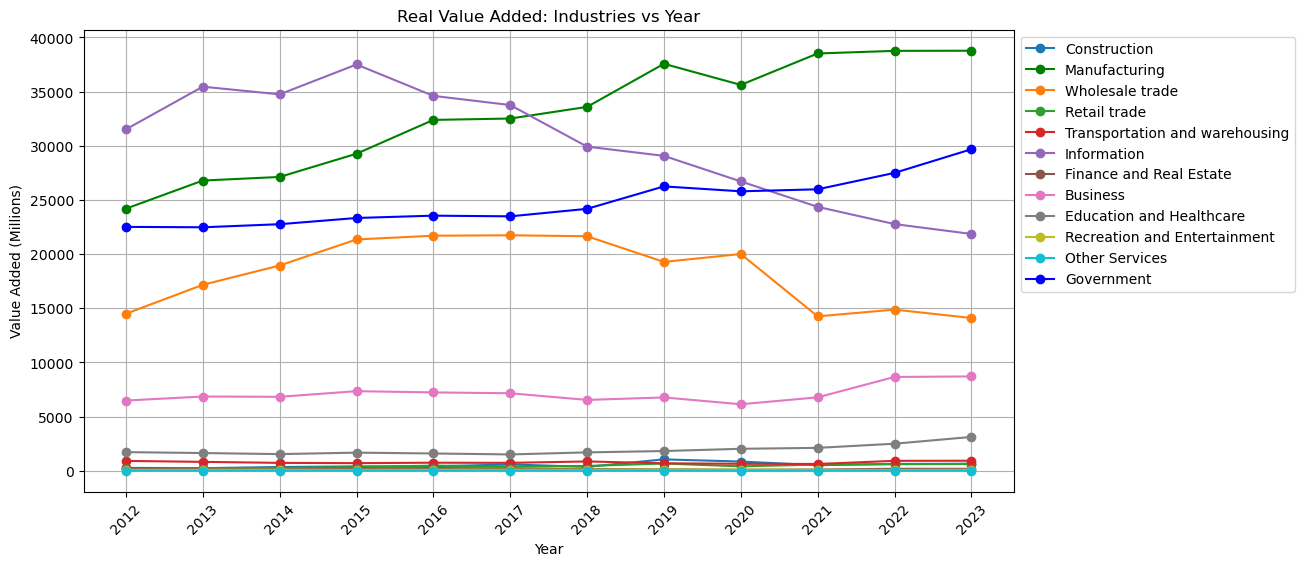

In [156]:
df_t = table1_data.set_index("Category").T
df_t = df_t.apply(pd.to_numeric, errors='coerce')
df_t.index = df_t.index.astype(int)

other_cols = [c for c in df_t.columns if c not in ["Space economy", "Private industries",
                                                   'Space economy excluding satellite television, satellite radio, and educational services']]

colors = {
    "Government": "blue",
    "Manufacturing": "green"
}

plt.figure(figsize=(12, 6))
for col in other_cols:
    plt.plot(df_t.index, df_t[col], marker="o", label=col, color=colors.get(col, None))  # None uses default cycle

plt.title("Real Value Added: Industries vs Year")
plt.xlabel("Year")
plt.ylabel("Value Added (Millions)")
plt.xticks(df_t.index, rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Shows us which industries have been most effected by the growth of the space economy, both negatively and positvely

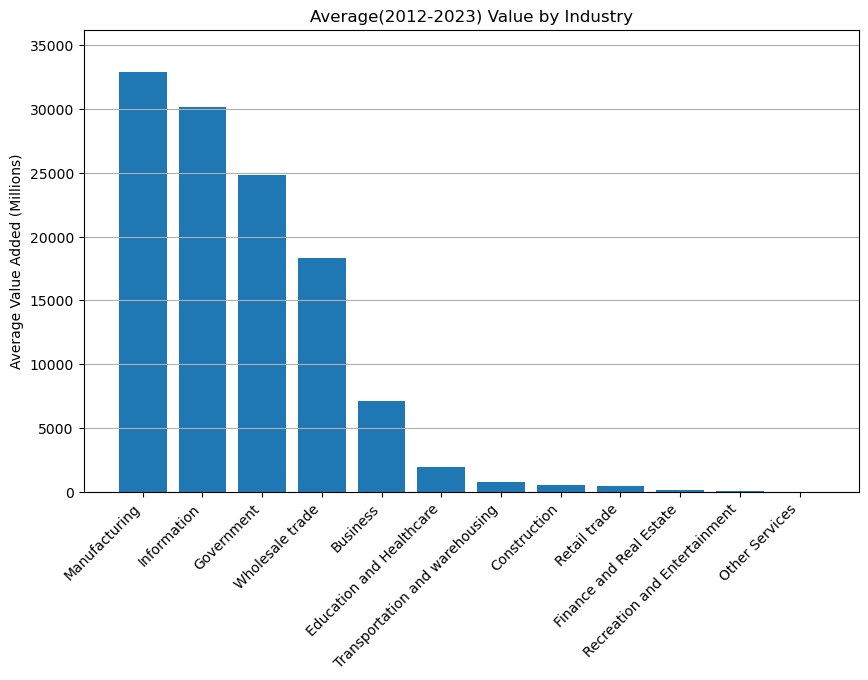

In [157]:
# Filter out the summary rows
rows_to_exclude = [
    "Space economy",
    "Private industries",
    "Space economy excluding satellite television, satellite radio, and educational services"
]
filtered_df = table1_data[~table1_data['Category'].isin(rows_to_exclude)]

# Set index and calculate the mean
df_indexed = filtered_df.set_index('Category')
average_by_industry = df_indexed.mean(axis=1)
average_by_industry_sorted = average_by_industry.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(average_by_industry_sorted.index, average_by_industry_sorted.values)

# Find the maximum value of the tallest bar
max_value = average_by_industry_sorted.iloc[0]

# Set the y-axis limit to be 20% higher than the max value
plt.ylim(top=max_value * 1.1)

# Add labels and title
plt.ylabel('Average Value Added (Millions)')
plt.title('Average(2012-2023) Value by Industry')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y');

This shows the average amount of value added by industry

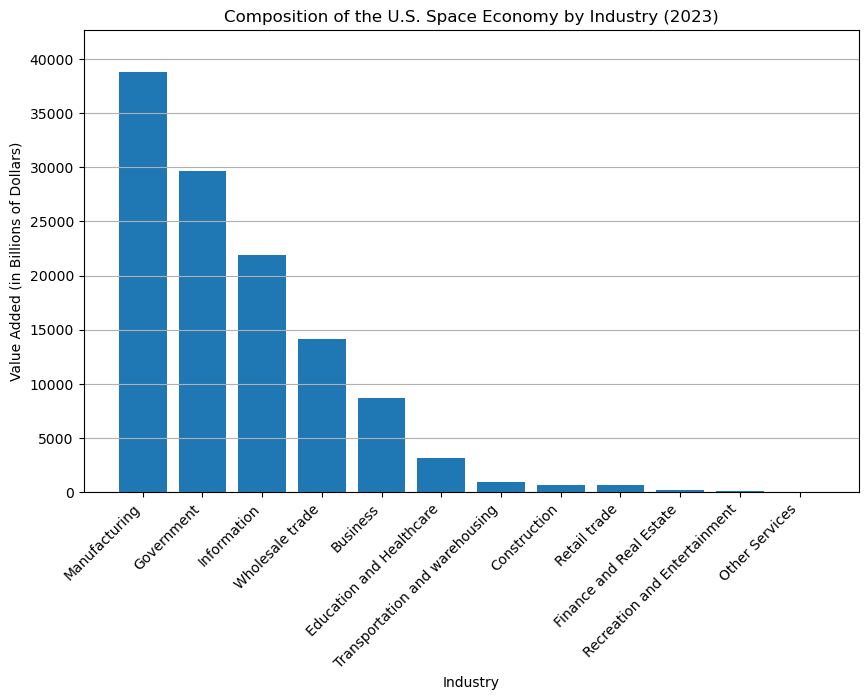

In [158]:
# Define and exclude summary rows
rows_to_exclude = ["Space economy", "Private industries", "Space economy excluding satellite television, satellite radio, and educational services"]
filtered_df = table1_data[~table1_data['Category'].isin(rows_to_exclude)]

# Select data for the latest year and sort it
latest_year_data = filtered_df[['Category', 2023]].sort_values(by=2023, ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(latest_year_data['Category'], latest_year_data[2023])

max_value = latest_year_data[2023].max()
plt.ylim(top=max_value * 1.1) 

# Add labels, title, and formatting
plt.xlabel('Industry')
plt.ylabel('Value Added (in Billions of Dollars)')
plt.title('Composition of the U.S. Space Economy by Industry (2023)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y');

This shows the amount of value added by industry recently, as of 2023

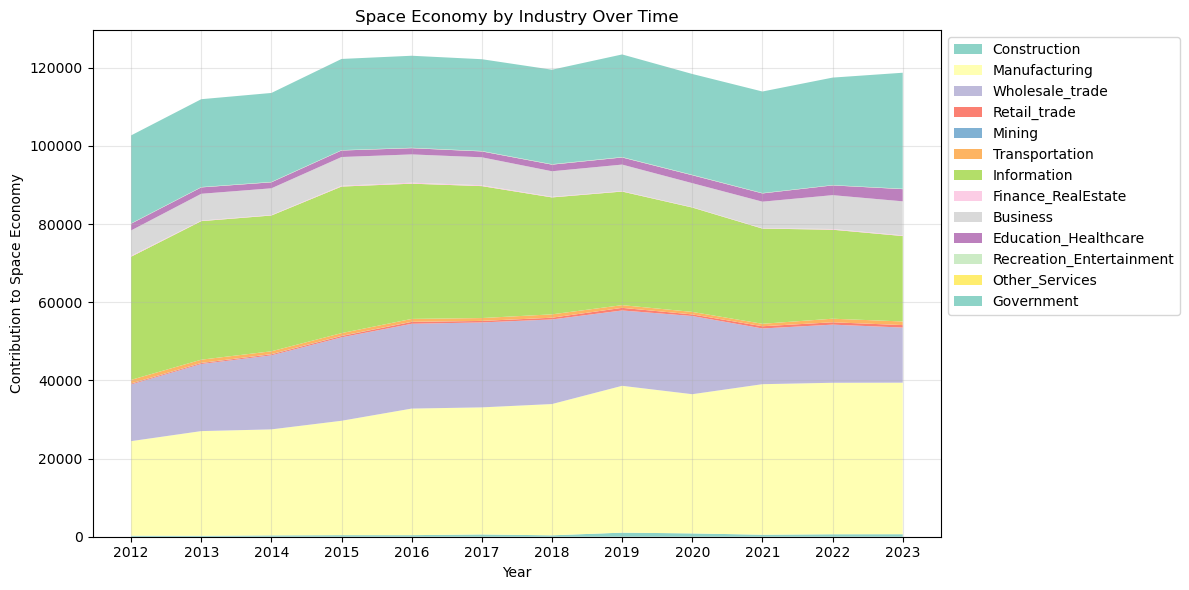

In [171]:
# Stacked area chart of sectors
colors = plt.cm.Set3.colors[:len(sectors)]
plt.figure(figsize=(12,6))
plt.stackplot(df["Year"], [df[sector] for sector in sectors], labels=sectors, colors=colors)
plt.xlabel("Year")
plt.ylabel("Contribution to Space Economy")
plt.title("Space Economy by Industry Over Time")
plt.xticks(df["Year"])  # show all years
plt.grid(alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

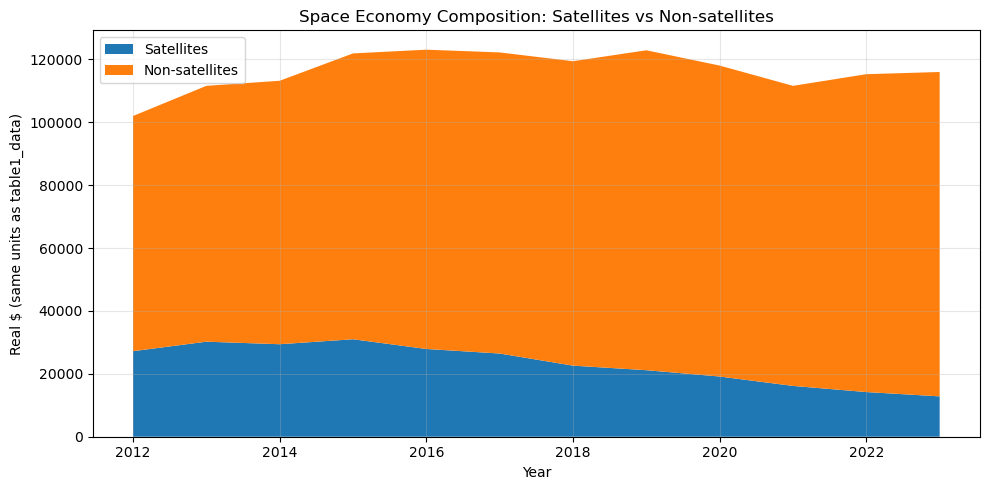

In [174]:

total_row   = table1_data[table1_data["Category"] == "Space economy"]
ex_sat_row  = table1_data[table1_data["Category"].str.startswith("Space economy excluding")]

total = total_row.drop(columns=["Category"]).T.squeeze().astype(float)
exsat = ex_sat_row.drop(columns=["Category"]).T.squeeze().astype(float)

total.index = total.index.astype(int)
exsat.index = exsat.index.astype(int)
years = total.index.intersection(exsat.index)
years = years.sort_values()

total = total.loc[years]
exsat = exsat.loc[years]

satellites = total - exsat
nonsat = exsat

fig, ax = plt.subplots(figsize=(10,5))
ax.stackplot(years, satellites, nonsat, labels=["Satellites", "Non-satellites"])
ax.set_title("Space Economy Composition: Satellites vs Non-satellites")
ax.set_ylabel("Real $ (same units as table1_data)")
ax.set_xlabel("Year")
ax.legend(loc="upper left")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Regression Model

In [167]:
data = {
    "Year": range(2012, 2024),
    "Space_economy": [101966,111559,113173,121868,123054,122183,119387,122860,118004,111560,115265,115962],
    "Mining": [53,41,51,45,26,10,4,5,2,2,2,2],
    "Construction": [265,239,346,406,403,585,360,1049,850,513,632,646],
    "Manufacturing": [24193,26789,27121,29264,32387,32514,33589,37565,35618,38519,38760,38773],
    "Wholesale_trade": [14496,17163,18946,21350,21696,21736,21647,19279,20007,14253,14875,14101],
    "Retail_trade": [219,245,259,331,478,379,442,667,406,570,602,631],
    "Transportation": [909,821,727,703,743,729,859,691,641,627,915,925],
    "Information": [31515,35454,34745,37502,34604,33759,29919,29066,26709,24360,22771,21859],
    "Finance_RealEstate": [242,145,131,209,255,220,154,133,97,112,183,178],
    "Business": [6481,6852,6826,7346,7232,7153,6539,6767,6139,6776,8659,8706],
    "Education_Healthcare": [1719,1635,1537,1672,1595,1506,1696,1820,2027,2112,2496,3121],
    "Recreation_Entertainment": [82,89,98,86,97,102,106,106,108,87,79,94],
    "Other_Services": [3,4,4,4,5,5,4,5,5,6,7,6],
    "Government": [22512,22474,22759,23333,23548,23485,24177,26249,25795,25981,27496,29679]
}

df = pd.DataFrame(data)

# List of sectors
sectors = ["Construction","Manufacturing","Wholesale_trade","Retail_trade", "Mining",
           "Transportation","Information","Finance_RealEstate","Business",
           "Education_Healthcare","Recreation_Entertainment","Other_Services","Government"]

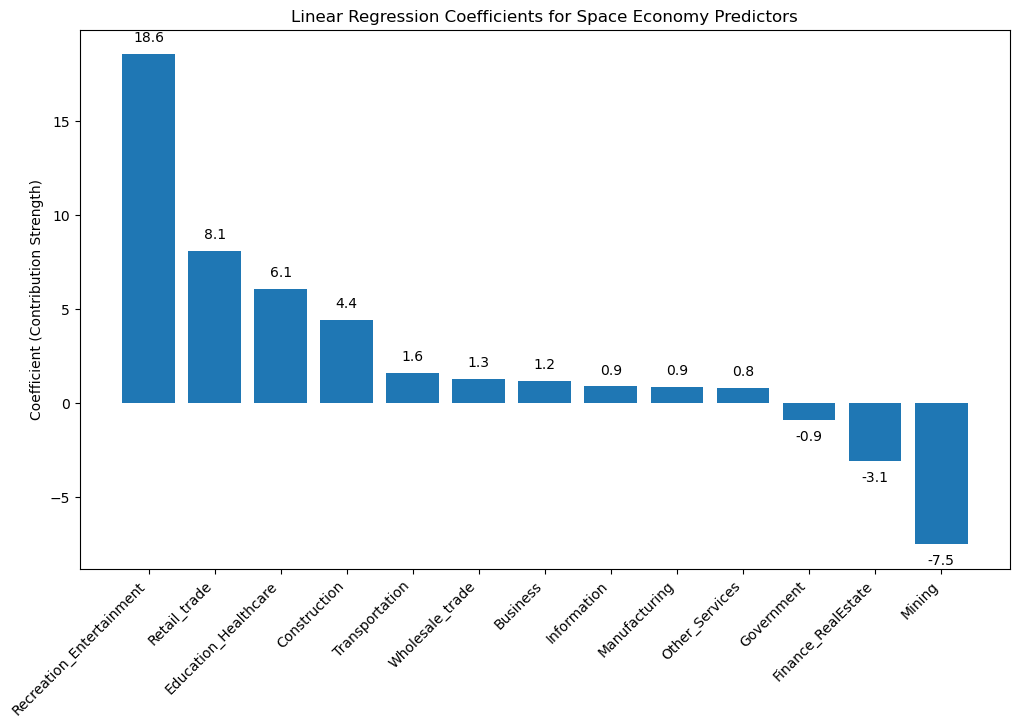

In [168]:
# Train regression model
X = df[sectors]
y = df["Space_economy"]
regression_model = LinearRegression()
regression_model.fit(X, y)

# Bar chart of coefficients
coefficients = pd.Series(regression_model.coef_, index=sectors).sort_values(ascending=False)
plt.figure(figsize=(12,7))
bars = plt.bar(coefficients.index, coefficients.values)

plt.ylabel("Coefficient (Contribution Strength)")
plt.title("Linear Regression Coefficients for Space Economy Predictors")
plt.xticks(rotation=45, ha='right')

# Add numbers on top/bottom of bars
for bar in bars:
    yval = bar.get_height()
    if yval >= 0:
        va = 'bottom'  # positive bars: number above
        offset = 0.5
    else:
        va = 'top'     # negative bars: number below
        offset = -0.5
    plt.text(bar.get_x() + bar.get_width()/2, yval + offset, f'{yval:.1f}', ha='center', va=va)

plt.show()

KeyError: 'Predicted'

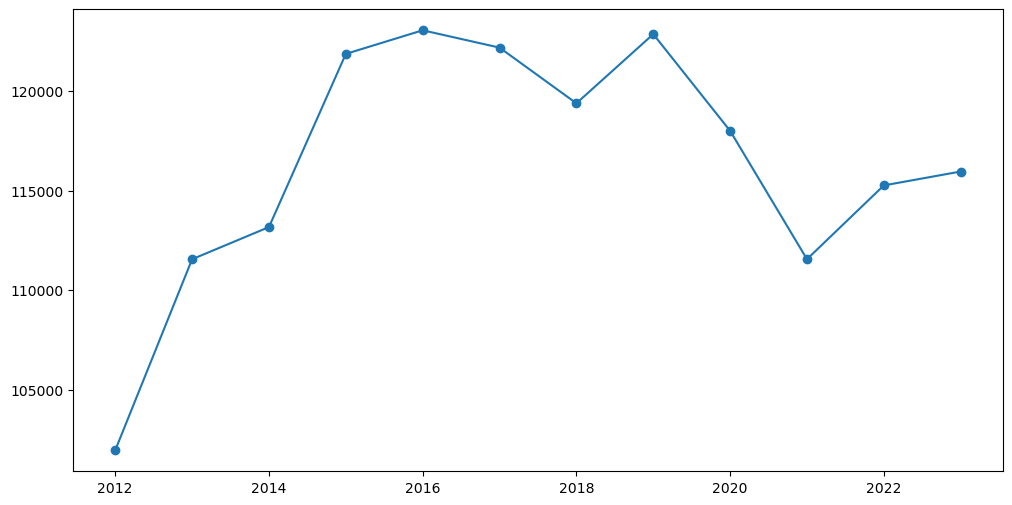

In [169]:
# Historical years for fitting the trend
X_years = df["Year"].values.reshape(-1,1)
y_space = df["Space_economy"].values

# Fit linear regression for line of best fit
fit_model = LinearRegression()
fit_model.fit(X_years, y_space)
y_fit = fit_model.predict(X_years)

# Plot historical + predicted + forecast + line of best fit
plt.figure(figsize=(12,6))

# Historical actual
plt.plot(df["Year"], df["Space_economy"], label="Historical", marker='o')
# Predicted historical from regression on sectors
plt.plot(df["Year"], df["Predicted"], label="Predicted Historical", linestyle='--', marker='x', color='red')
# Forecast 2024-2025
plt.plot(forecast_df.index, forecast_df["Predicted_Space_Economy"], label="Forecast 2024-2025", linestyle='--', marker='s', color='green')


plt.xlabel("Year")
plt.ylabel("Space Economy")
plt.title("Space Economy: Historical, Predicted, Forecast + Trend Line")
plt.xticks(list(df["Year"])+list(forecast_df.index))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [166]:
# Predict
df["Predicted"] = model.predict(X)

# Model evaluation
r2 = r2_score(y, df["Predicted"])
mae = mean_absolute_error(y, df["Predicted"])
rmse = np.sqrt(mean_squared_error(y, df["Predicted"]))

print("R²:", r2)
print("RMSE:", rmse)
print("Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef}")

NameError: name 'model' is not defined